## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
from keras.datasets import fashion_mnist
#load data set
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [345]:
print('Number of training samples : ',x_train.shape[0])

Number of training samples :  60000


In [346]:
print('Number of test samples : ',x_test.shape[0])

Number of test samples :  10000


### Find dimensions of an image in the dataset

In [347]:
print('Size of the image :',x_train[0].shape)

Size of the image : (28, 28)


It is a gray scale image of size 28*28

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
#Load the library
from keras.utils import np_utils

In [0]:
#one hot encoding of test and train labels
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [350]:
# Check for coding of labels
print('Train label :',y_train[0])
print('Test Label :',y_test[0])

Train label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Test Label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Normalize both the train and test image data from 0-255 to 0-1

In [351]:
x_train=x_train/255
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [352]:
x_test=x_test/255
print(x_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [353]:
x_train[0].shape

(28, 28)

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [355]:
# check shape
x_train[0].shape

(28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Reshape,Conv2D,MaxPool2D
from tensorflow.keras import callbacks

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
#Initialize batchsize and epoch as varaibles
Batchsize=32
Epoch=10

In [0]:
# initialize the model
model1=Sequential()

In [0]:
# first conv layer with relu activation
model1.add(Conv2D(32,3,3,input_shape=(28,28,1)))
model1.add(Activation('relu'))

In [0]:
# second conv layer iwth relu activation
model1.add(Conv2D(32,3,3,))
model1.add(Activation('relu'))

In [0]:
# fully connected layer with relu activation
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

In [0]:
# fulley connect out layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

In [0]:
# compile the model
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# Store Training Results
early_stopping =callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [365]:
#model summary
model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 9, 9, 32)          320       
_________________________________________________________________
activation_63 (Activation)   (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_64 (Activation)   (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               36992     
_________________________________________________________________
activation_65 (Activation)   (None, 128)             

In [366]:
#Train the model
history=model1.fit(x_train,y_train,batch_size=Batchsize,epochs=Epoch,callbacks=callback_list,validation_data=(x_test,y_test),verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4994 - accuracy: 0.8207 - val_loss: 0.4238 - val_accuracy: 0.8428
Epoch 2/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.3497 - accuracy: 0.8709 - val_loss: 0.3518 - val_accuracy: 0.8665
Epoch 3/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3090 - accuracy: 0.8856 - val_loss: 0.3241 - val_accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2811 - accuracy: 0.8959 - val_loss: 0.3044 - val_accuracy: 0.8895
Epoch 5/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.2613 - accuracy: 0.9023 - val_loss: 0.3132 - val_accuracy: 0.8859
Epoch 6/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2438 - accuracy: 0.9092 - val_loss: 0.2940 - val_accuracy: 0.8902
Epoch 7/10
60000/60000 [==========================

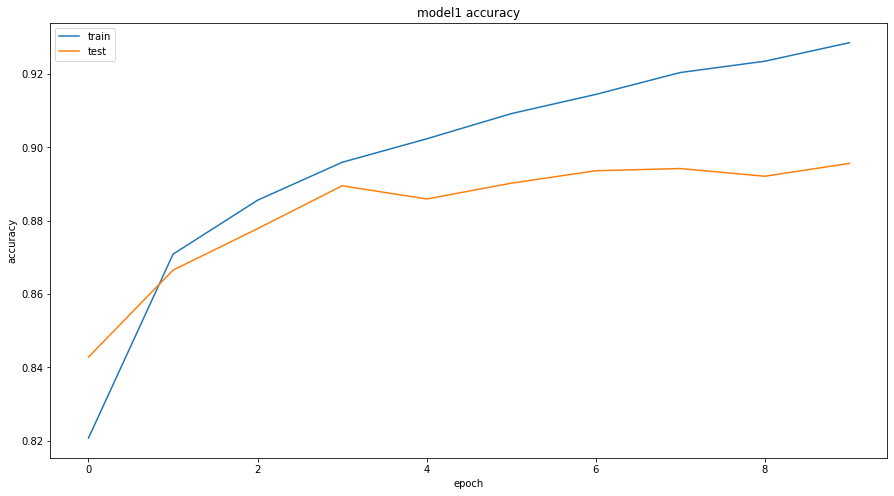

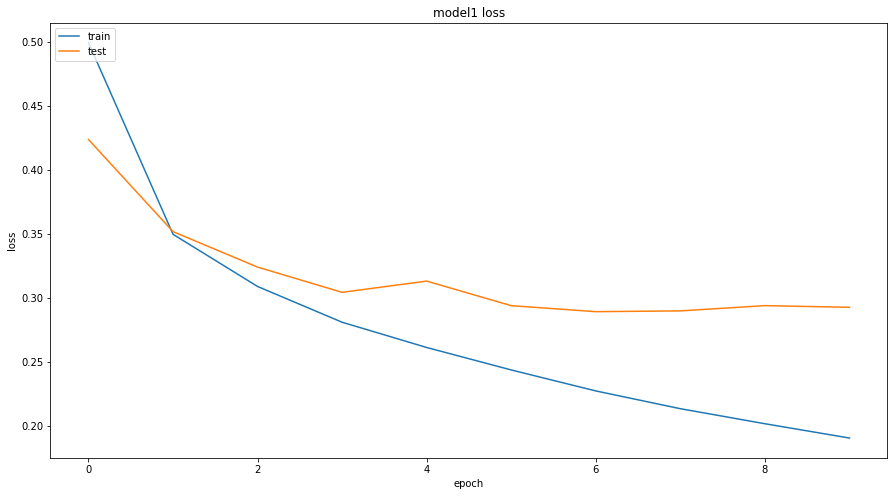

In [367]:
 # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train accuracy : 0.9285167
Test accuracy : 0.8956


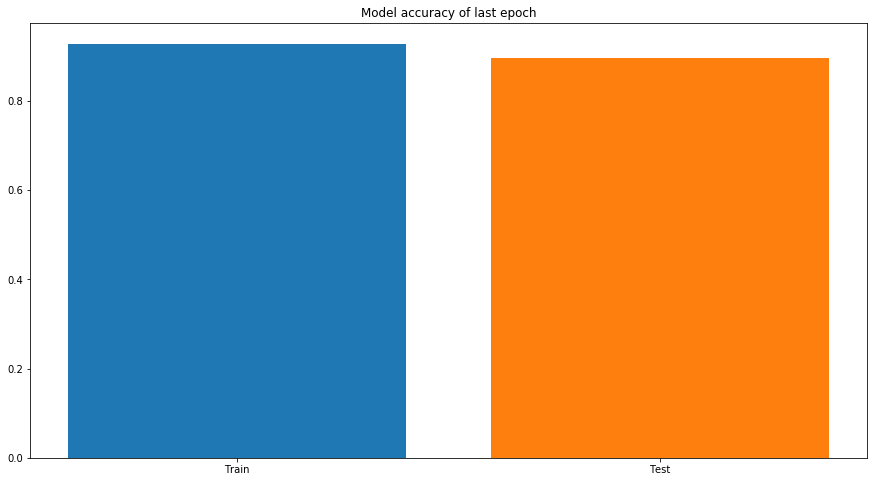

In [368]:
plt.title('Model accuracy of last epoch')
plt.bar('Train',history.history['accuracy'][-1])
plt.bar('Test',history.history['val_accuracy'][-1])
print ('Train accuracy :',history.history['accuracy'][-1])
print ('Test accuracy :',history.history['val_accuracy'][-1])

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Initialize batchsize and epoch as varaibles
Batchsize=32
Epoch=10

In [0]:
# initialize the model
model2=Sequential()

In [0]:
# conv layer 1
model2.add(Conv2D(32,3,3,input_shape=(28,28,1)))
model2.add(Activation('relu'))

In [0]:
# conv layer 2
model2.add(Conv2D(32,3,3))
model2.add(Activation('relu'))

In [0]:
# maxpool layer
model2.add(MaxPool2D(pool_size=(2,2)))

In [0]:
# add drop out layer
model2.add(Dropout(0.25))

In [0]:
#fully connected layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

In [0]:
#output layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [0]:
# compile the model
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
#store training results
early_stopping =callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [380]:
model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 9, 9, 32)          320       
_________________________________________________________________
activation_67 (Activation)   (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_68 (Activation)   (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 32)              

Number of trainable parameter reduced due to max pooling

In [381]:
# train the model
history=model2.fit(x_train,y_train,batch_size=Batchsize,epochs=Epoch,callbacks=callback_list,validation_data=(x_test,y_test),verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.8982 - accuracy: 0.6748 - val_loss: 0.6435 - val_accuracy: 0.7630
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.6850 - accuracy: 0.7495 - val_loss: 0.5752 - val_accuracy: 0.7867
Epoch 3/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.6303 - accuracy: 0.7688 - val_loss: 0.5496 - val_accuracy: 0.7956
Epoch 4/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.6024 - accuracy: 0.7796 - val_loss: 0.5245 - val_accuracy: 0.8031
Epoch 5/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5774 - accuracy: 0.7856 - val_loss: 0.5146 - val_accuracy: 0.8087
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5620 - accuracy: 0.7915 - val_loss: 0.5142 - val_accuracy: 0.8092
Epoch 7/10
60000/60000 [==========================

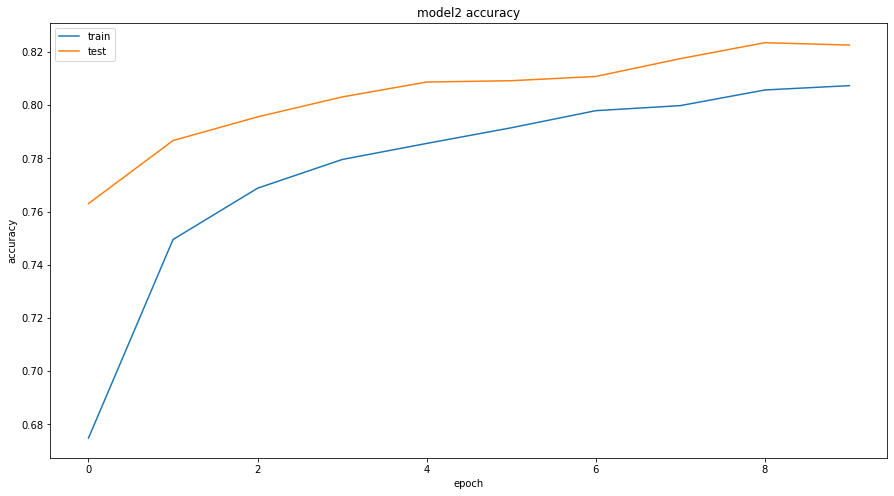

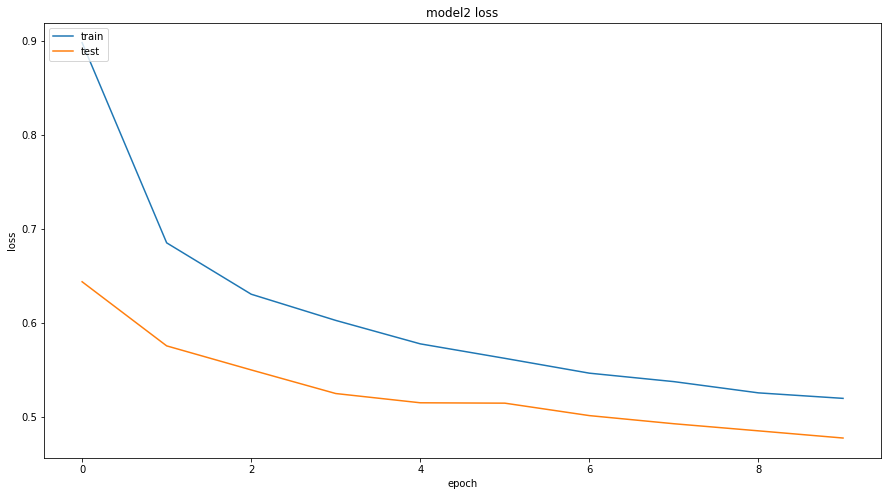

In [383]:
 # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train accuracy : 0.80735
Test accuracy : 0.8226


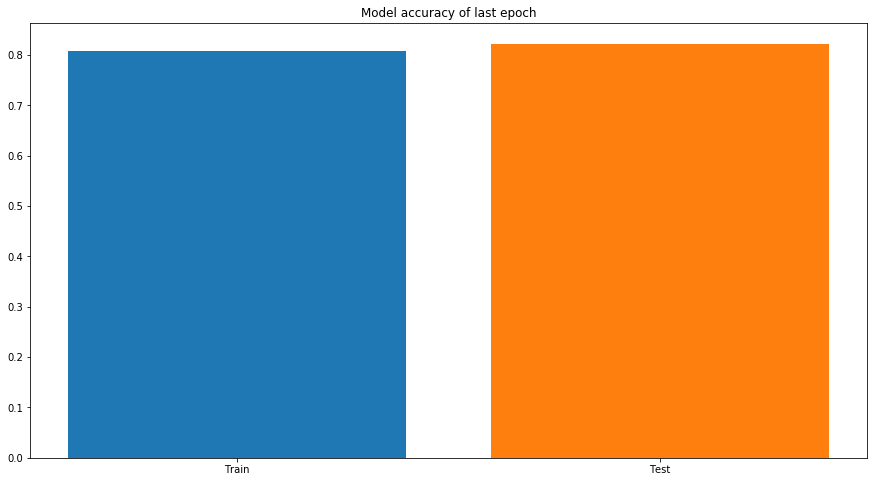

In [384]:
plt.title('Model accuracy of last epoch')
plt.bar('Train',history.history['accuracy'][-1])
plt.bar('Test',history.history['val_accuracy'][-1])
print ('Train accuracy :',history.history['accuracy'][-1])
print ('Test accuracy :',history.history['val_accuracy'][-1])

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

[]

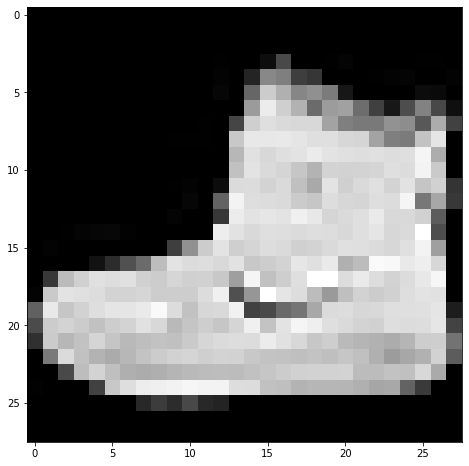

In [387]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

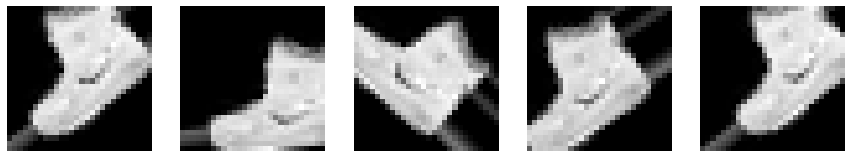

In [388]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [389]:
history=model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    steps_per_epoch=x_train.shape[0]/Batchsize,
                    epochs=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

  ...
    to  
  ['...']
Train for 1875.0 steps, validate on 10000 samples
Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.7027 - accuracy: 0.3581 - val_loss: 1.1926 - val_accuracy: 0.5941
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.5222 - accuracy: 0.4222 - val_loss: 1.0970 - val_accuracy: 0.6188
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.4582 - accuracy: 0.4466 - val_loss: 1.1312 - val_accuracy: 0.5870
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.4039 - accuracy: 0.4698 - val_loss: 1.1356 - val_accuracy: 0.5980
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.3726 - accuracy: 0.4821 - val_loss: 1.1449 - val_accuracy: 0.5972
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.3513 - accuracy: 0.4918 - val_loss: 1.1653 - val_accuracy: 0.5873
Epoch 7/10
1875/1875 [===========================

###  Report the final train and validation accuracy

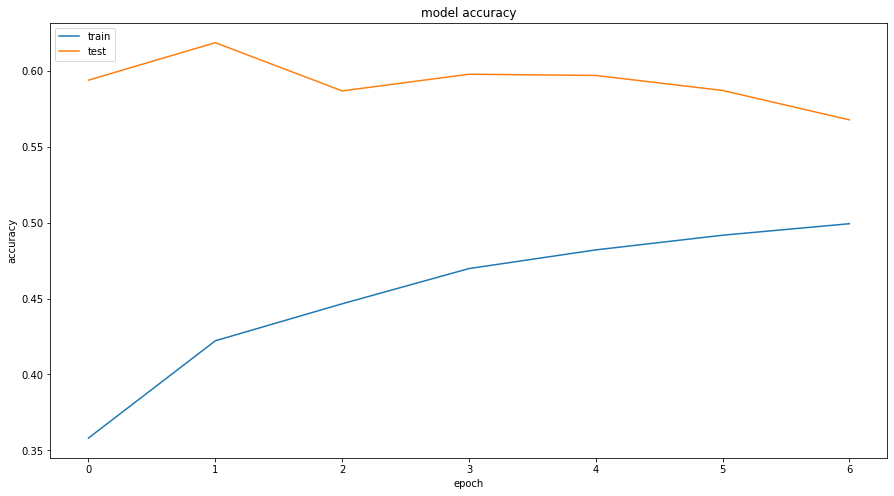

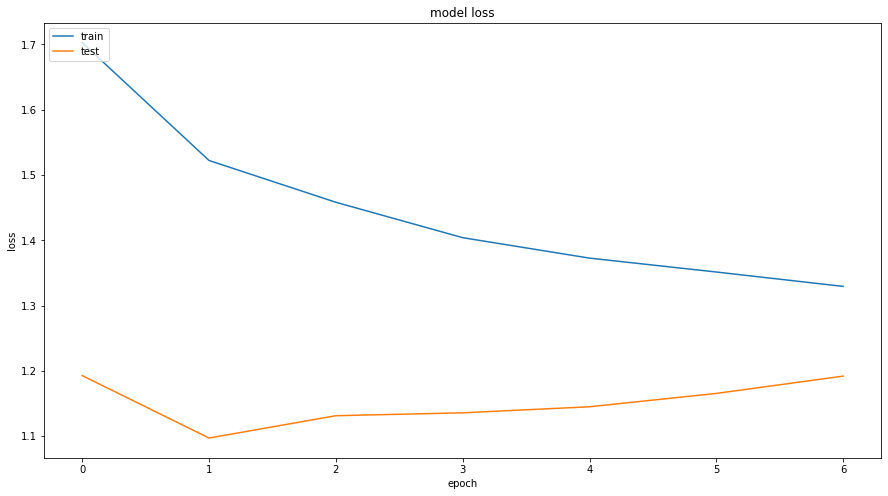

In [390]:
 # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train accuracy : 0.49941668
Test accuracy : 0.5679


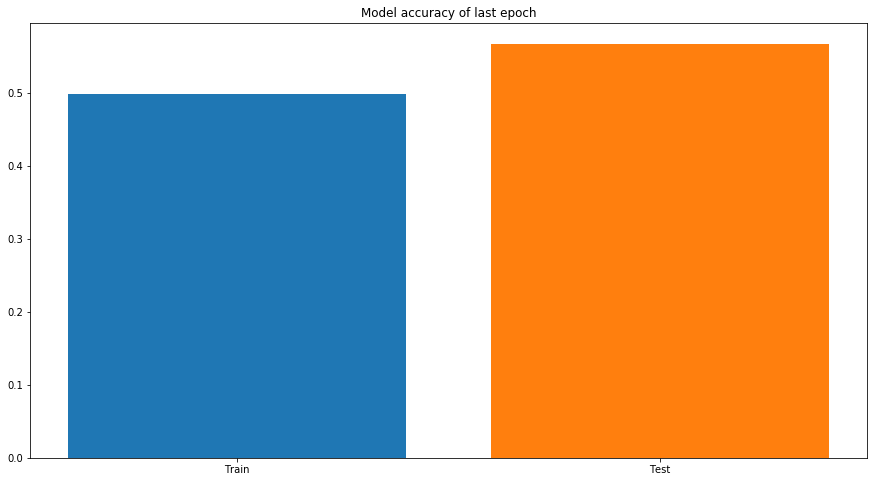

In [391]:
plt.title('Model accuracy of last epoch')
plt.bar('Train',history.history['accuracy'][-1])
plt.bar('Test',history.history['val_accuracy'][-1])
print ('Train accuracy :',history.history['accuracy'][-1])
print ('Test accuracy :',history.history['val_accuracy'][-1])

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 8)

### **Load CIFAR10 dataset**

In [0]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [394]:
print('Number of training images : ',x_train.shape[0])
print ('Number of testing images :',x_test.shape[0])
print ('Size of the image :',x_train[0].shape)

Number of training images :  50000
Number of testing images : 10000
Size of the image : (32, 32, 3)


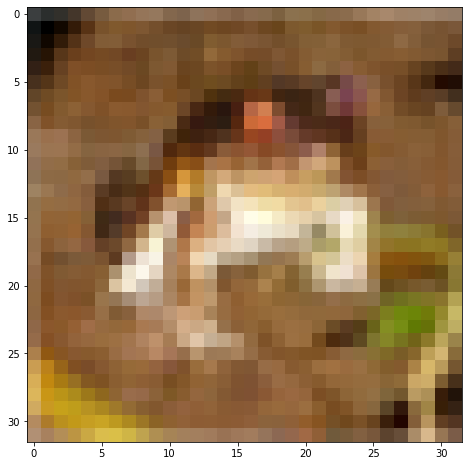

In [395]:
plt.figure(figsize=(8,8))
plt.imshow(x_train[0].squeeze())

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
def data_gen():
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
      featurewise_center=False,  # set input mean to 0 over the dataset
      samplewise_center=False,  # set each sample mean to 0
      featurewise_std_normalization=False,  # divide inputs by std of the dataset
      samplewise_std_normalization=False,  # divide each input by its std
      zca_whitening=False,  # apply ZCA whitening
      rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
      width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
      height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
      horizontal_flip=True,  # randomly flip images
      vertical_flip=True)  # randomly flip images

      return datagen

### **Prepare/fit the generator.**

In [0]:
datagen=data_gen()
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

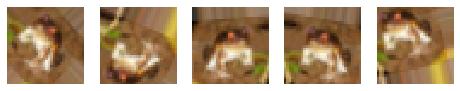

In [398]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap=None)
    plt.plot()
plt.show()